In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

Data Collection & Analysis

In [2]:
#loading the data freom csv file to Pandas DataFrame
ins_data = pd.read_csv("C:/Users/Lokesh Gulia/Documents/insurance.csv")

In [3]:
ins_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Here are 3 categorical features
- sex
- smoker
- region

In [4]:
ins_data.shape

(1338, 7)

In [5]:
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#Checking for missing values
ins_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#Description of dataset
ins_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


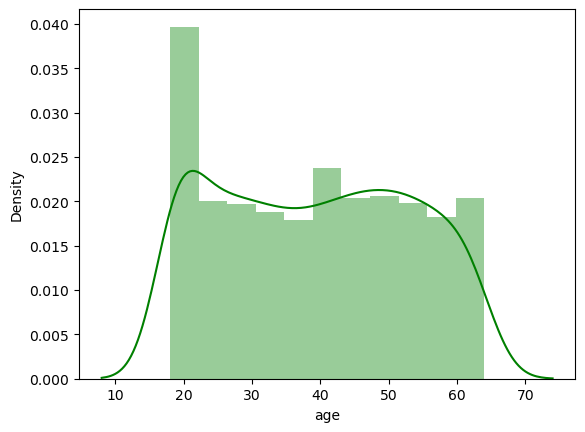

In [8]:
#Distribution of age
sns.distplot(ins_data['age'], color='g');

<Axes: xlabel='sex', ylabel='count'>

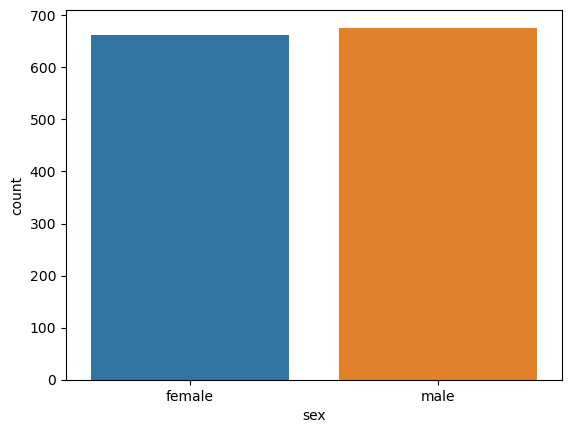

In [9]:
#Distribution of sex
sns.countplot(x = 'sex' , data = ins_data)

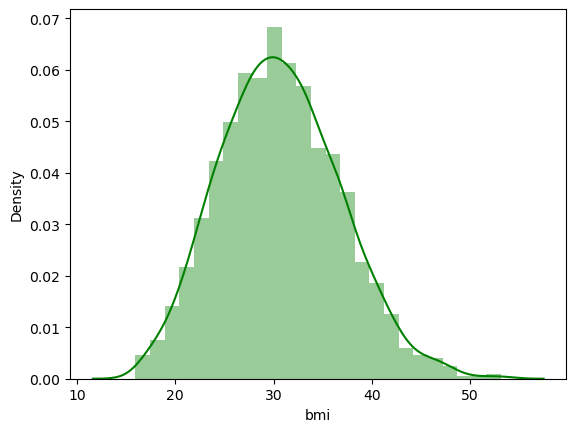

In [10]:
#Distribution of bmi
sns.distplot(ins_data['bmi'],color='g');

<Axes: xlabel='children', ylabel='count'>

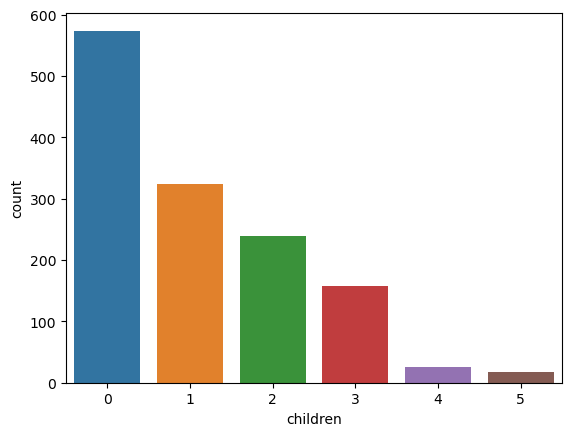

In [11]:
#Distribution of children
sns.countplot(x = 'children' , data = ins_data)

<Axes: xlabel='smoker', ylabel='count'>

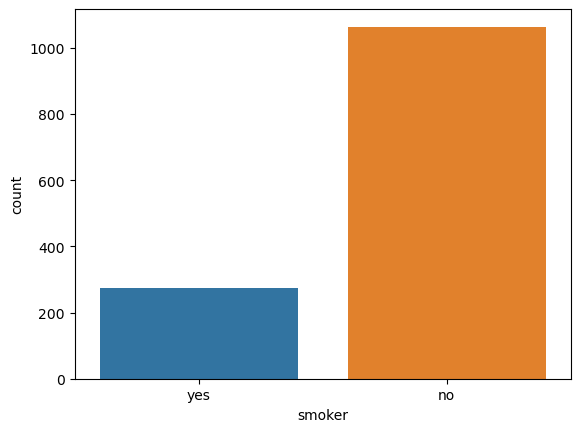

In [12]:
#Distribution of smoker
sns.countplot(x = 'smoker' , data = ins_data)

In [13]:
ins_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<Axes: xlabel='region', ylabel='count'>

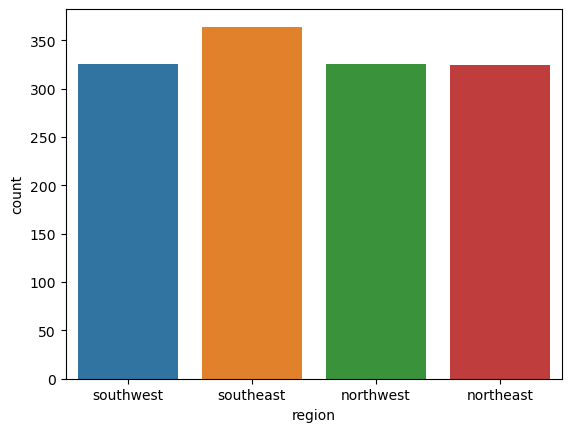

In [14]:
#Distribution of region
sns.countplot(x = 'region' , data = ins_data)

In [15]:
ins_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

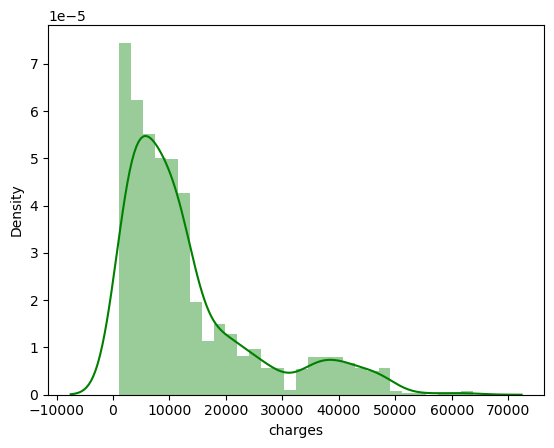

In [16]:
#Distribution of charges
sns.distplot(ins_data['charges'], color='g');

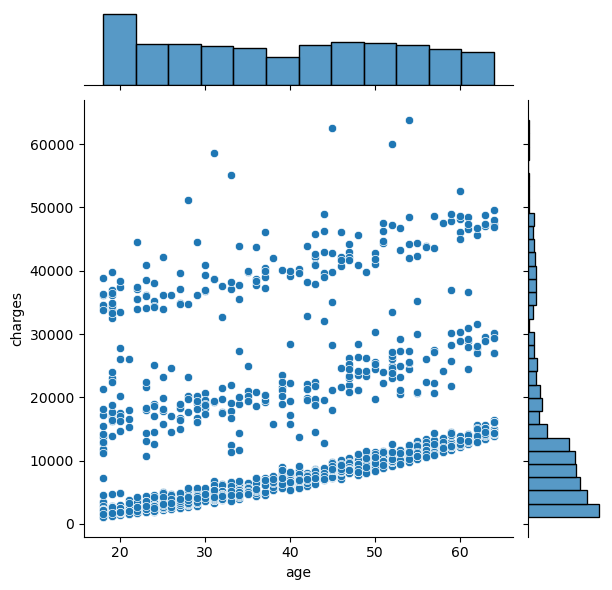

In [17]:
#relation between age and charges
sns.jointplot(x= "age" , y = "charges" , data = ins_data)

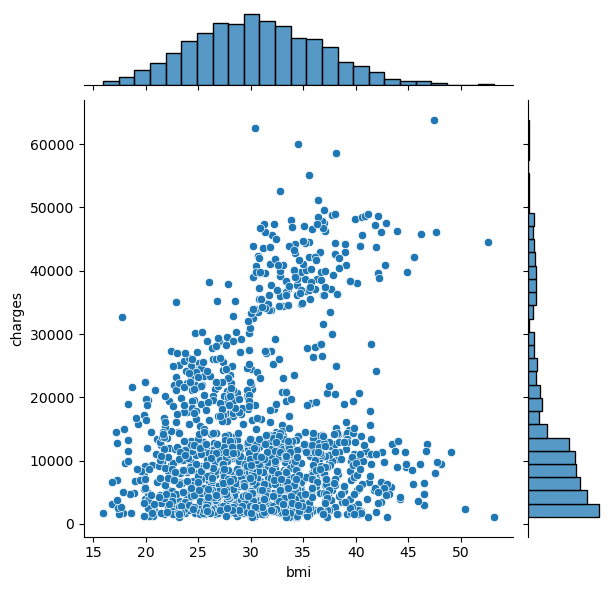

In [18]:
#relation between bmi and charges
sns.jointplot(x= "bmi" , y = "charges" , data = ins_data)

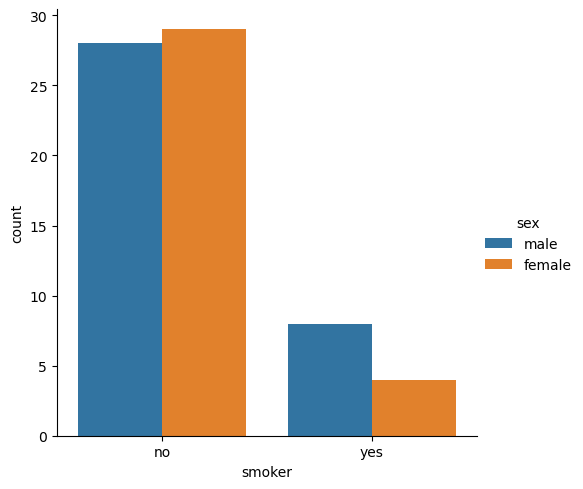

In [19]:
#Distribution of smoker at age 18
sns.catplot(x='smoker',kind='count', hue='sex',data=ins_data[(ins_data.age==18)])

<Axes: xlabel='sex', ylabel='charges'>

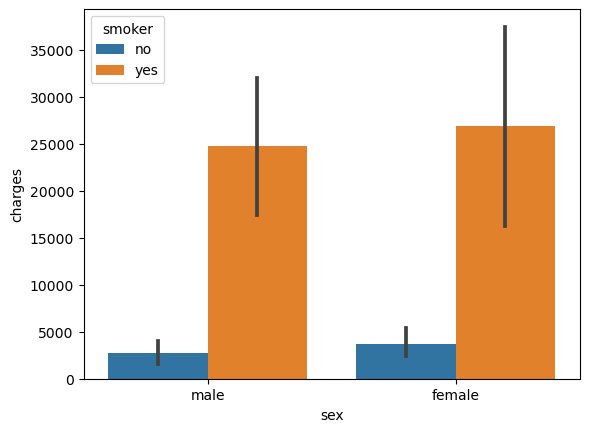

In [20]:
#Distribution of charges for smoker at age 18
sns.barplot(x='sex',y='charges',hue='smoker',data=ins_data[(ins_data.age==18)])

In [21]:
#Regions with charges
ins_data.groupby("region")['charges'].max().sort_values()

region
southwest    52590.82939
northeast    58571.07448
northwest    60021.39897
southeast    63770.42801
Name: charges, dtype: float64

<Axes: xlabel='region', ylabel='charges'>

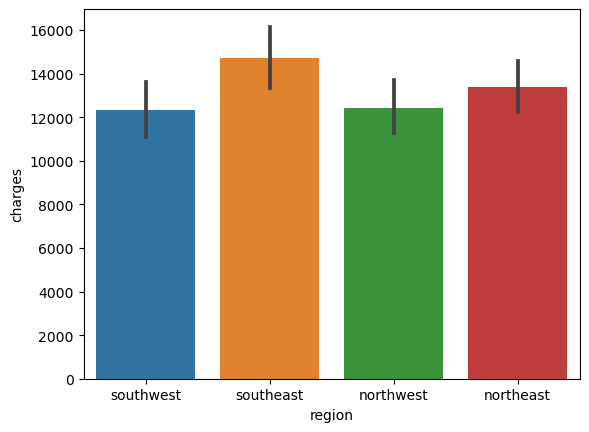

In [22]:
#Distribution of charges with regions
sns.barplot(x='region',y='charges', data=ins_data)

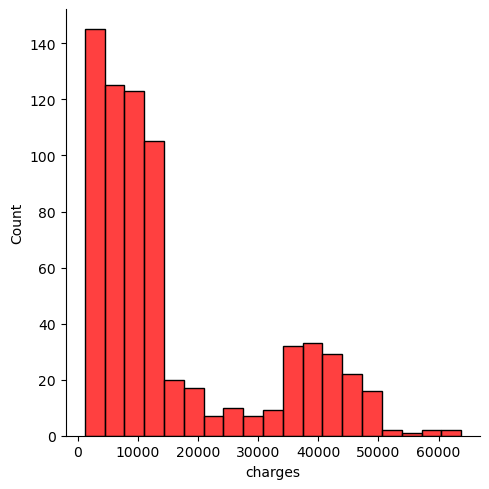

In [23]:
#Charges for bmi > 30 
sns.displot(ins_data[(ins_data.bmi>=30)]['charges'],color='r')

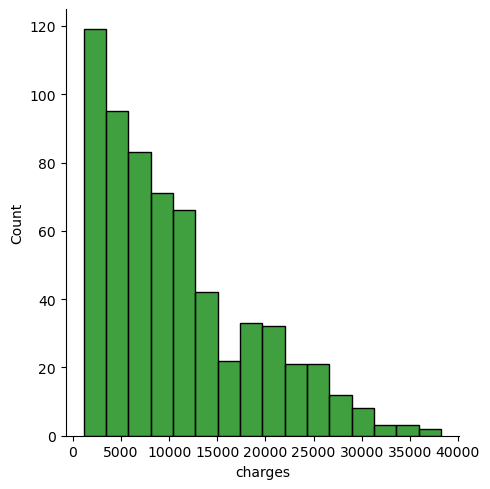

In [24]:
#Charges for bmi < 30
sns.displot(ins_data[(ins_data.bmi<=30)]['charges'],color='g')

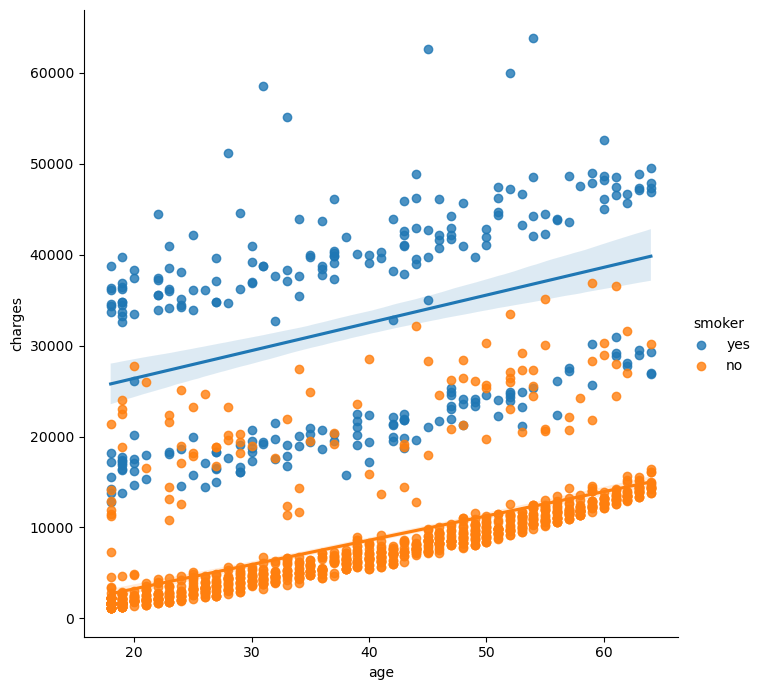

In [25]:
#Relation b/w charges wrt age 
sns.lmplot(x='age',y='charges', hue='smoker',data=ins_data, height=7)

Encoding Categorical features

In [28]:
ins_data.replace({'sex':{'male':1,'female':0}},inplace=True)
ins_data.replace({'smoker':{'yes':1,'no':0}},inplace=True)
ins_data.replace({'region':{'southeast':1,'southwest':2,'northeast':3,'northwest':4}},inplace=True)

In [29]:
ins_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,4,21984.47061
4,32,1,28.880,0,0,4,3866.85520


Splitting of independent and dependent features

In [31]:
X=ins_data.drop(columns='charges',axis=1)
Y=ins_data['charges']

Splitting of data into training and test data

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print("shape of X",X.shape)
print("shape of X_train",X_train.shape)
print("shape of X_test",X_test.shape)

shape of X (1338, 6)
shape of X_train (1070, 6)
shape of X_test (268, 6)


Linear Regression

In [33]:
model_lr=LinearRegression()
model_lr.fit(X_train,Y_train)

LinearRegression()

In [35]:
# r2_score for training data
train_pred=model_lr.predict(X_train)
train_score=r2_score(Y_train,train_pred)
print("r2 score for training data: ",train_score)

r2 score for training data:  0.751505643411174


In [37]:
# r2_score for test data
test_pred=model_lr.predict(X_test)
test_score1=r2_score(Y_test,test_pred)
print("r2 score for testing data: ",test_score1)

r2 score for testing data:  0.7447273869684076


KNN Regressor

In [39]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor()

# Fit the model
knn_regressor.fit(X_train, Y_train)


KNeighborsRegressor()

SVM Regressor

In [40]:
from sklearn.svm import SVR

# Initialize the SVM regressor
svm_regressor = SVR()

# Fit the model
svm_regressor.fit(X_train, Y_train)

SVR()

Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor()
reg.fit(X_train,Y_train)
y_pred=reg.predict(X_test)

In [42]:
y_pred

array([ 2352.96845 , 10214.636   , 25656.57526 ,  1720.3537  ,
        8606.2174  ,  5438.7491  ,  2789.0574  ,  2198.18985 ,
       24513.09126 ,  7201.70085 , 12224.35085 ,  4830.63    ,
       18608.262   ,  1131.5066  , 10043.249   , 14001.2867  ,
        2137.6536  ,  6128.79745 , 21659.9301  ,  7323.734819,
       11842.62375 ,  2331.519   , 39047.285   , 20773.62775 ,
       37465.34375 , 12029.2867  ,  3558.62025 ,  9704.66805 ,
        3987.926   ,  2483.736   ,  6474.013   ,  3292.52985 ,
       17626.23951 ,  4243.59005 ,  7726.854   , 14133.03775 ,
       39722.7462  ,  5028.1466  , 18310.742   , 13937.6665  ,
        2128.43105 , 36021.0112  ,  7222.78625 ,  1875.344   ,
        6770.1925  ,  4889.9995  ,  9620.3307  ,  3875.7341  ,
        4686.3887  , 10713.644   , 26018.95052 ,  1242.26    ,
       17352.6803  , 43254.41795 ,  6500.2359  , 11411.685   ,
        1972.95    ,  7162.0122  ,  2150.469   , 42124.5153  ,
       30166.61817 ,  1980.07    ,  2855.43755 , 42124.

In [43]:
# r2_score for test data
test_pred=reg.predict(X_test)
test_score=r2_score(Y_test,y_pred)
print("r2 score for testing data by Decision Tree: ",test_score)

r2 score for testing data by Decision Tree:  0.693947983864956


Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor(n_estimators=10)
rfr.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=10)

AdaBoost Model

In [45]:
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor()
adr.fit(X_train,Y_train)

AdaBoostRegressor()

Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,Y_train)

GradientBoostingRegressor()

In [47]:
import xgboost as xgb

# Initialize the XGBoost regressor
xgbr = xgb.XGBRegressor()

# Fit the model
xgbr.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Prediction on Test Data

In [77]:
test_pred=model_lr.predict(X_test)
knn_pred = knn_regressor.predict(X_test)
svm_pred = svm_regressor.predict(X_test)
rf_pred=rfr.predict(X_test)
adr_pred=adr.predict(X_test)
test_pred = gbr.predict(X_test)
xgbr_pred = xgbr.predict(X_test)

data_actual = pd.DataFrame({'Actual':Y_test,'model_lr':test_pred,'knn_regressor':knn_pred,'svm_regressor':svm_pred,
               'rfr.predict':rf_pred,'adr.predict':adr_pred,'gbr.predict':test_pred,'xgbr.predict':xgbr_pred})

In [66]:
data_actual

,Actual,model_lr,knn_regressor,svm_regressor,rfr.predict,adr.predict,gbr.predict,xgbr.predict
17,2395.17155,3997.205442,2494.841260,9194.989367,6383.087333,7078.125304,3997.205442,6585.429688
1091,11286.53870,12159.050017,19889.854392,9380.502862,11370.110190,13969.752277,12159.050017,10226.253906
273,9617.66245,11134.165033,15737.033822,9349.513232,14361.594643,13134.689021,11134.165033,22521.087891
270,1719.43630,3009.267748,7914.847760,9181.832600,3631.788958,6870.654814,3009.267748,3745.503906
874,8891.13950,10056.388319,11042.951650,9307.269629,10501.652462,13134.689021,10056.388319,8498.017578
...,...,...,...,...,...,...,...,...
232,1727.78500,8227.747750,2069.044410,9189.949867,1730.022900,7078.125304,8227.747750,2279.701172
323,11566.30055,13566.571354,15424.531176,9391.769643,16865.690594,13969.752277,13566.571354,17661.341797
1337,29141.36030,28319.448971,19685.770672,9408.512946,28737.937385,25135.919228,28319.448971,29002.847656
1066,8978.18510,10065.341206,29566.661640,9341.255456,9217.011745,13134.689021,10065.341206,7261.624512


Compare Performance Visually

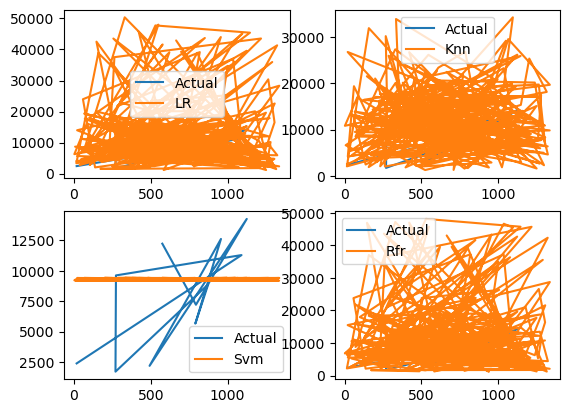

In [78]:
ply.subplot(221)
ply.plot(data_actual['Actual'].iloc[0:11],label='Actual')
ply.plot(data_actual['model_lr'],label='LR')
ply.legend()

ply.subplot(222)
ply.plot(data_actual['Actual'].iloc[0:11],label='Actual')
ply.plot(data_actual['knn_regressor'],label='Knn')
ply.legend()

ply.subplot(223)
ply.plot(data_actual['Actual'].iloc[0:11],label='Actual')
ply.plot(data_actual['svm_regressor'],label='Svm')
ply.legend()

ply.subplot(224)
ply.plot(data_actual['Actual'].iloc[0:11],label='Actual')
ply.plot(data_actual['rfr.predict'],label='Rfr')
ply.legend()


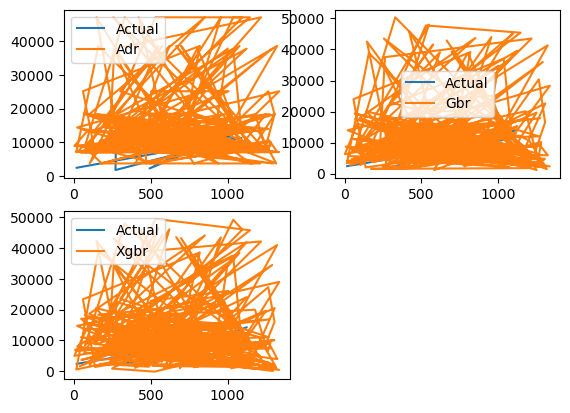

In [74]:
ply.subplot(221)
ply.plot(data_actual['Actual'].iloc[0:11],label='Actual')
ply.plot(data_actual['adr.predict'],label='Adr')
ply.legend()

ply.subplot(222)
ply.plot(data_actual['Actual'].iloc[0:11],label='Actual')
ply.plot(data_actual['gbr.predict'],label='Gbr')
ply.legend()

ply.subplot(223)
ply.plot(data_actual['Actual'].iloc[0:11],label='Actual')
ply.plot(data_actual['xgbr.predict'],label='Xgbr')
ply.legend()

Evaluating the best Algorithm

In [83]:
from sklearn import metrics

In [87]:
score1= metrics.r2_score(Y_test,test_pred)
score2= metrics.r2_score(Y_test,knn_pred)
score3= metrics.r2_score(Y_test,svm_pred)
score4= metrics.r2_score(Y_test,rf_pred)
score5= metrics.r2_score(Y_test,adr_pred)
score6= metrics.r2_score(Y_test,test_pred)
score7= metrics.r2_score(Y_test,xgbr_pred)

In [88]:
print(score1,score2,score3,score4,score5,score6,score7)

0.8676364308198913 0.039080982959716515 -0.08037769618231372 0.831496488452322 0.8321649410920192 0.8676364308198913 0.8144316777193814


# BEST ALGORITHM 
- Gradient Boosting

Predict Charges For New Customer

In [92]:
data = {'age':40,'sex':1,'bmi':25.44,'children':3,'smoker':1,'region':3}
df= pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,25.44,3,1,3


In [97]:
new_pred= gbr.predict(df)
new_pred


array([20073.15566944])

Save Gradient Boosting Model on Entire Dataset

In [98]:
gbr=GradientBoostingRegressor()
gbr.fit(X,Y)

GradientBoostingRegressor()

In [99]:
import joblib

In [100]:
joblib.dump(gbr,'Medical Cost Predictor')

['Medical Cost Predictor']

In [101]:
model = joblib.load('Medical Cost Predictor')

In [102]:
model.predict(df)

array([20329.09958628])